In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import sys
sys.path.append('../../py/')

from cosmoSim import cosmoSim

In [54]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

ALPHA=0.3
FIGSIZE=[12,12]
DPI=300

snap_no = 7

In [55]:

CDM_runs = [ f'run_CDM_L3N256_DM_dir_{i}' for i in range(10) ]

tcDM_runs1 = [ f'run_2cDM_L3N256_DM_power00_sigma1_dir_{i}' for i in range(10) ]

tcDM_runs2 = [ f'run_2cDM_L3N256_DM_powerm2m2_sigma1_dir_{i}' for i in range(10) ]


/home/ryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


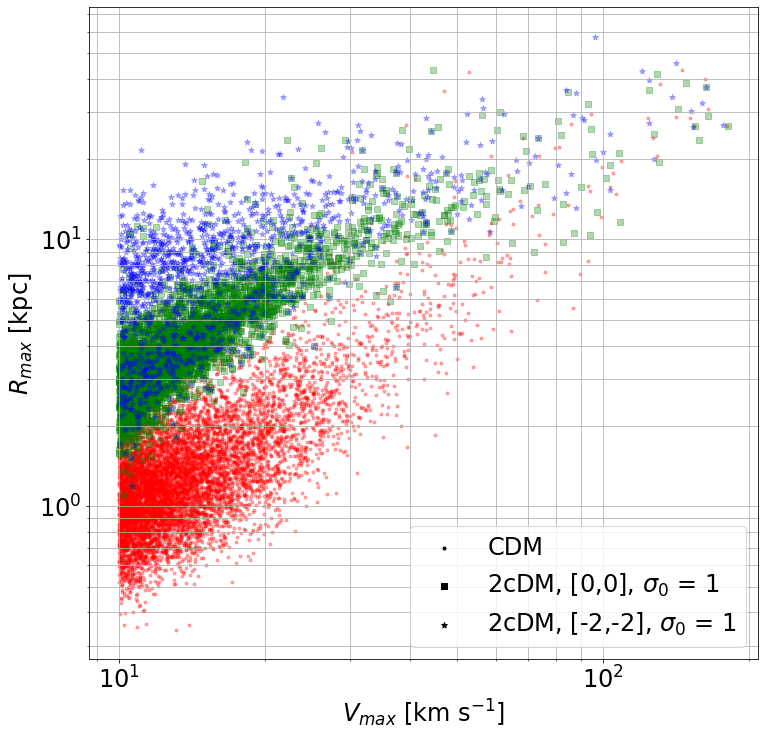

In [56]:
fig, ax = plt.subplots(1, 1, figsize=FIGSIZE)

for r in CDM_runs:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='.', color='r', alpha=ALPHA)

for r in tcDM_runs1:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='s', color='g', alpha=ALPHA)

for r in tcDM_runs2:
    run = cosmoSim(r)

    Vmax, Rmax, subhaloMass = run.load_subhalo_info(run.redshifts[snap_no])[:3]

    allowed = Vmax > 10

    ax.scatter(Vmax[allowed], Rmax[allowed], marker='*', color='b', alpha=ALPHA)

ax.scatter([],[], marker='.', label='CDM', color='k')
ax.scatter([],[], marker='s', label='2cDM, [0,0], $\sigma_0$ = 1', color='k')
ax.scatter([],[], marker='*', label='2cDM, [-2,-2], $\sigma_0$ = 1', color='k')

ax.set_xlabel("$V_{max}$ [km s$^{-1}$]")
ax.set_ylabel("$R_{max}$ [kpc]")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True, which="both", ls="-")

ax.legend()

fig.show()